In [43]:
from facenet.align import detect_face
from scipy import misc
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from utilities import show
%matplotlib inline

## Setting up the tensorflow session

In [2]:
gpu_memory_fraction = 1.0
minsize = 50 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor

In [3]:
with tf.Graph().as_default():
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
    with sess.as_default():
        pnet, rnet, onet = detect_face.create_mtcnn(sess, None)

## Detecting a single face

In [28]:
img = cv2.cvtColor(cv2.imread('images/dicaprio-oscar.jpg'), cv2.COLOR_BGR2RGB)

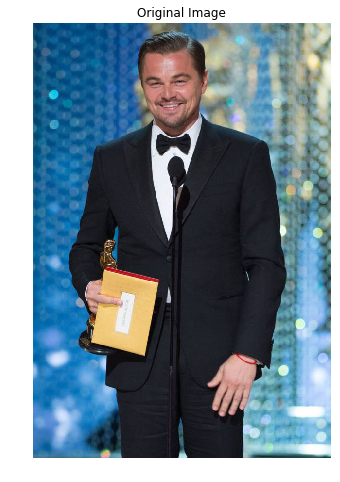

In [5]:
show(img,title='Original Image', figsize=(8,8))

In [9]:
face_locations , _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)

In [10]:
type(face_locations)

numpy.ndarray

In [11]:
face_locations.shape

(1, 5)

face_locations is a two dimentional numpy array. The first dimention represents number of faces found in the image. The second dimention represents location of the face and accuracy. 

In [39]:
left, top, right, bottom, accuracy = [int(i) for i in face_locations[0]]

In [40]:
print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

A face is located at pixel location Top: 61, Left: 225, Bottom: 206, Right: 339


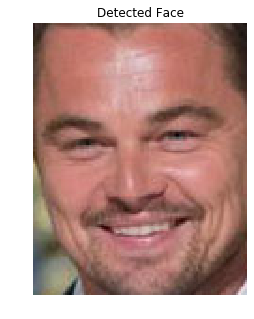

In [41]:
show(img[top:bottom, left:right], title='Detected Face', figsize=(5,5))

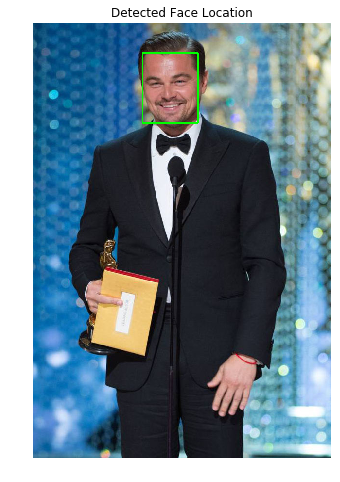

In [44]:
img_cpy = np.copy(img)
_ = cv2.rectangle(img_cpy,(left,top),(right,bottom),(0,255,0),2)
show(img_cpy, title='Detected Face Location', figsize=(8,8))

## Detecting multiple faces

In [45]:
img = cv2.cvtColor(cv2.imread('images/oscar-group.jpg'), cv2.COLOR_BGR2RGB)

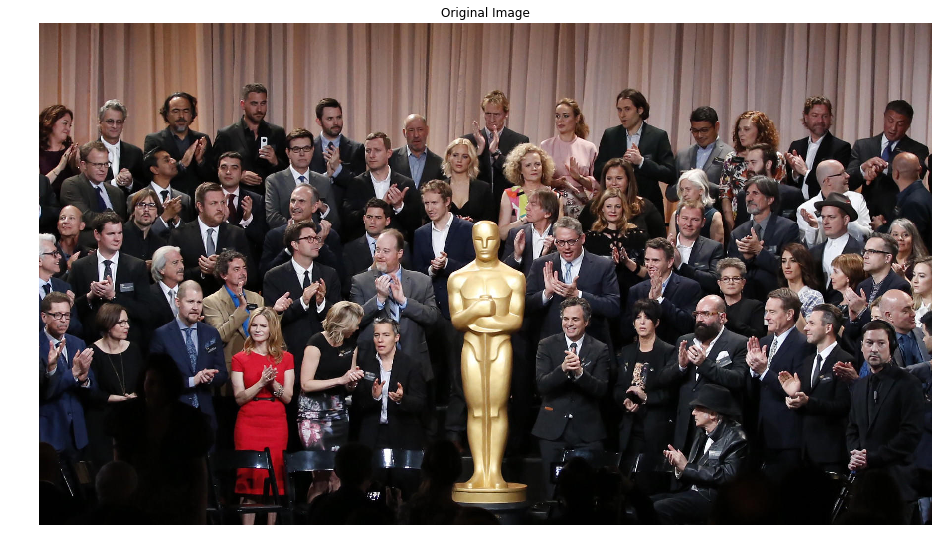

In [49]:
show(img,title='Original Image')

In [50]:
face_locations , _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)

In [53]:
print('Number of faces detected : {}'.format(face_locations.shape[0]))

Number of faces detected : 64


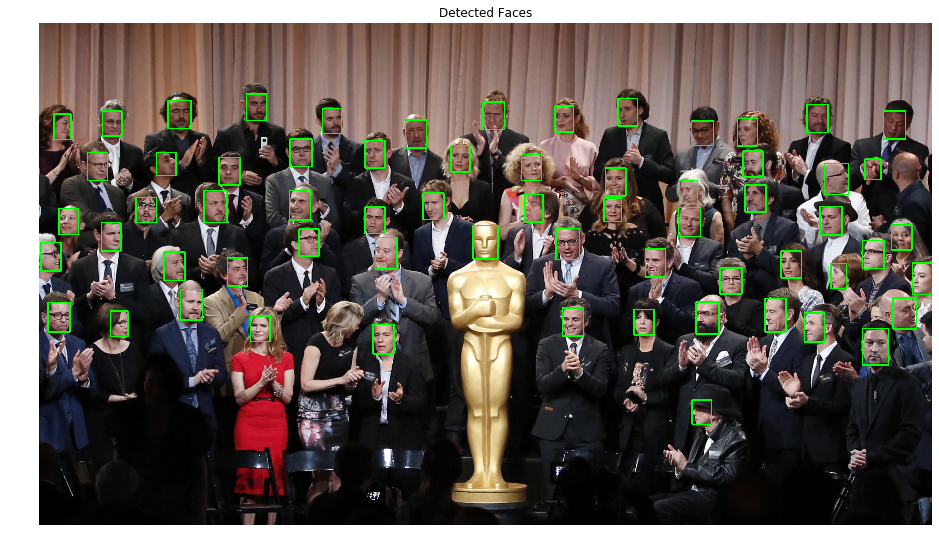

In [56]:
img_cpy = np.copy(img)
for face_location in face_locations:
    left, top, right, bottom, accuracy = [int(i) for i in face_location]
    _ = cv2.rectangle(img_cpy,(left,top),(right,bottom),(0,255,0),2)
show(img_cpy, title='Detected Faces')